In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate a synthetic dataset with two features
#np.random.seed(0)
#X = np.random.randn(200, 2)

In [3]:
# Create two non-linearly separable classes
X[:100] += 2
X[100:] -= 2

In [4]:
# Create labels for the two classes (+1 and -1)
y = np.ones(200)
y[100:] = -1

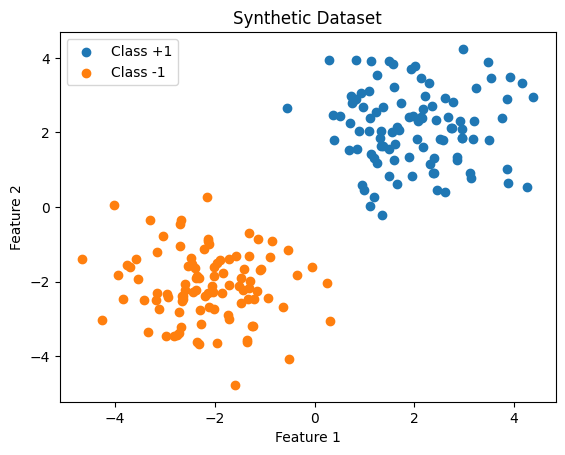

In [5]:
# Visualize the dataset
plt.scatter(X[:100, 0], X[:100, 1], label='Class +1')
plt.scatter(X[100:, 0], X[100:, 1], label='Class -1')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset')
plt.show()

In [6]:
def passive_aggressive(X, y, eta, C, max_iterations):
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    
    for _ in range(max_iterations):
        for i in range(n_samples):
            x_i = X[i, :]
            prediction = np.dot(theta, x_i)
            loss = max(0, 1 - y[i] * prediction)
            
            if loss == 0:
                continue
            
            # Compute the learning rate (eta)
            eta_i = min(C, loss / np.linalg.norm(x_i, 2)**2)
            
            # Update the weight vector (theta)
            theta += eta_i * y[i] * x_i
            
    return theta

In [7]:
# Define hyperparameters
eta = 0.01  # Learning rate
C = 1.0     # Regularization parameter
max_iterations = 100


In [8]:
# Train the passive-aggressive classifier
theta = passive_aggressive(X, y, eta, C, max_iterations)

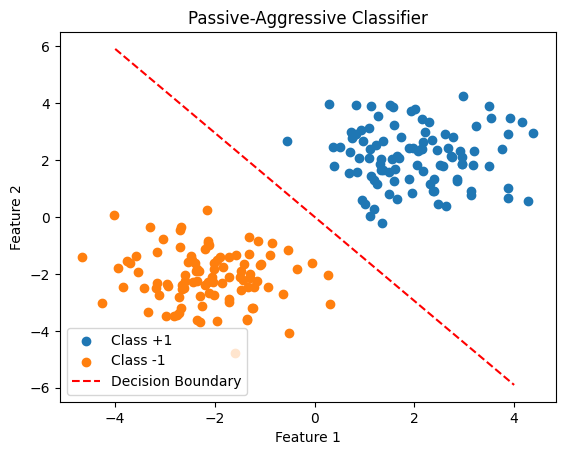

In [9]:
# Visualize the decision boundary
plt.scatter(X[:100, 0], X[:100, 1], label='Class +1')
plt.scatter(X[100:, 0], X[100:, 1], label='Class -1')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Passive-Aggressive Classifier')
x_decision_boundary = np.linspace(-4, 4, 400)
y_decision_boundary = (-theta[0] * x_decision_boundary) / theta[1]
plt.plot(x_decision_boundary, y_decision_boundary, color='red', linestyle='--', label='Decision Boundary')
plt.legend()
plt.show()